In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import analysis_util
import statistics
colors=['darkgray','gray','dimgray','lightgray']

### Complete dataset (175,805 chunks) used by Ghiotto et al. 2020

In [2]:
all_chunks = pd.read_csv('data/all_chunks_ghiotto.csv')
print(f'Total chunks: {len(all_chunks)}')
all_chunks.head()

Total chunks: 175805


,chunk_id,revision_id,sha,file_id,developerdecision,project
0,776661,1025174,c3b5f5d43f5699e2e4d698bd32a74dad9ac1d477,341963,Version 1,3scale/3scale_ws_api_for_java
1,776662,1025176,332b6ed4e324199565e235cd915368f9bc1b43d2,341965,Combination,3scale/3scale_ws_api_for_java
2,776697,1025480,41b35cd3c4fa423382bac2a22d0da09da6008730,342000,Version 2,bndtools/bndtools
3,776700,1025497,8f113c6f5d090ff539f3c342591a575b976fd23d,342003,Version 1,bndtools/bndtools
4,776710,1025548,567eec5076644db52aef9a4ef3ac06bb1d3b1878,342014,Version 2,cwensel/cascading


How many merges have only chunks resolved with "Combination"?

In [3]:
counts = all_chunks.groupby('sha')['developerdecision'].value_counts().unstack().reset_index()
counts = counts.fillna(0)
counts['chunks'] = counts['Combination'] + counts['Concatenation'] + counts['Manual'] + counts['None'] + counts['Version 1'] + counts['Version 2']
print(f'All merges: {len(counts)} merges')
counts.head()


All merges: 25328 merges


developerdecision,sha,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
0,0007571f54dbbbda8d4492e74b3eacb7ee562926,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,000bd2ff6db0144b479badddb92eb5c10a4a2111,1.0,0.0,3.0,0.0,0.0,1.0,5.0
2,000d1fb3ba5816a94582473762fd3517600a70e4,0.0,1.0,2.0,0.0,0.0,2.0,5.0
3,000da137253684137c7c423220ae5601fbda334c,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,000e080ee0066cced016fc3b5e8603b0efbc56e2,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [4]:
only_combination_complete = counts[counts['chunks'] == counts['Combination']]
print(f'Total merges that use only combination: {len(only_combination_complete)} ({(len(only_combination_complete)/len(counts))*100:.2f}%)')
hybrid_complete = counts[counts['Combination'] > 0]
print(f'Total merges that use combination and possibly others: {len(hybrid_complete)} ({(len(hybrid_complete)/len(counts))*100:.2f}%)')

Total merges that use only combination: 2282 (9.01%)
Total merges that use combination and possibly others: 7010 (27.68%)


How many files have only chunks resolved with "Combination"?

In [5]:
counts = all_chunks.groupby('file_id')['developerdecision'].value_counts().unstack().reset_index()
counts = counts.fillna(0)
counts['chunks'] = counts['Combination'] + counts['Concatenation'] + counts['Manual'] + counts['None'] + counts['Version 1'] + counts['Version 2']
print(f'All Files: {len(counts)} files')
counts.head()

All Files: 78937 files


developerdecision,file_id,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
0,341963,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,341965,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,342000,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,342003,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,342014,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [6]:
only_combination_complete_files = counts[counts['chunks'] == counts['Combination']]
print(f'Total files that use only combination: {len(only_combination_complete_files)} ({(len(only_combination_complete_files)/len(counts))*100:.2f}%)')
hybrid_complete_files = counts[counts['Combination'] > 0]
print(f'Total files that use combination and possibly others: {len(hybrid_complete_files)} ({(len(hybrid_complete_files)/len(counts))*100:.2f}%)')

Total files that use only combination: 7734 (9.80%)
Total files that use combination and possibly others: 12531 (15.87%)


### Our corpus (includes only chunks that were resolved with combination)

In [7]:
df = analysis_util.get_chunks_dataset()
print(len(df))
df.head()

All chunks:  10726
Total projects:  1082
Filtered 6 of 1082 projects for being implicit forks: {'RealVNC/android-frameworks-base-with-screenshot-tweaks', 'IceColdSandwich/android_frameworks_base', 'adetaylor/android-frameworks-base-with-remote-control-service', 'AOKP/frameworks_base_disabled', 'cgjones/android-frameworks-base', 'allwinner-ics/platform_frameworks_base'}
Total valid projects:  1076
Valid chunks:  10177
10177


,chunk_id,sha,fileSize,partial_order,chunk_size,resolution_size,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,332b6ed4e324199565e235cd915368f9bc1b43d2,204.0,True,18,12,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,b9e82842917f541594a67c44639201895caa4b28,251.0,True,86,101,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,b9e82842917f541594a67c44639201895caa4b28,1001.0,True,5,5,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,514.0,True,5,3,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,782.0,True,5,5,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [8]:
df = df[['chunk_id', 'fileSize', 'resolution_size', 'chunk_size', 'sha', 'v1_size', 'v2_size' ]]

How many merges in total?

In [9]:
len(df['sha'].unique())

5346

How many merges that include our selected chunks have only chunks resolved with "Combination"?

In [10]:
selected_merges = list(all_chunks[all_chunks['chunk_id'].isin(df['chunk_id'])]['sha'])
selected_chunks = all_chunks[all_chunks['sha'].isin(selected_merges)]
counts = selected_chunks.groupby('sha')['developerdecision'].value_counts().unstack().reset_index()
counts = counts.fillna(0)
counts['chunks'] = counts['Combination'] + counts['Concatenation'] + counts['Manual'] + counts['None'] + counts['Version 1'] + counts['Version 2']
print(f'Total: {len(counts)} merges')
only_combination = counts[counts['chunks'] == counts['Combination']].copy()
print(f'Total merges that use only combination: {len(only_combination)} ({(len(only_combination)/len(counts))*100:.2f}%)')

hybrid = counts[counts['Combination'] > 0]
print(f'Total merges that use combination and possibly others: {len(hybrid)} ({(len(hybrid)/len(counts))*100:.2f}%)')

Total: 5346 merges
Total merges that use only combination: 1726 (32.29%)
Total merges that use combination and possibly others: 5346 (100.00%)


How many files in total?

In [11]:
df_files = df.drop('sha', 1).merge(all_chunks, how='left', on='chunk_id', suffixes=('',''))
display(df_files)
print(f"{len(df_files['file_id'].unique())} files in total")

,chunk_id,fileSize,resolution_size,chunk_size,v1_size,v2_size,revision_id,sha,file_id,developerdecision,project
0,776662,204.0,12,18,6,12,1025176,332b6ed4e324199565e235cd915368f9bc1b43d2,341965,Combination,3scale/3scale_ws_api_for_java
1,776782,251.0,101,86,33,53,1025582,b9e82842917f541594a67c44639201895caa4b28,342076,Combination,cwensel/cascading
2,776793,1001.0,5,5,4,1,1025582,b9e82842917f541594a67c44639201895caa4b28,342083,Combination,cwensel/cascading
3,776828,514.0,3,5,3,2,1025583,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,342100,Combination,cwensel/cascading
4,776863,782.0,5,5,1,4,1025595,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,342118,Combination,cwensel/cascading
...,...,...,...,...,...,...,...,...,...,...,...
10172,1652324,441.0,2,3,1,2,2756555,fa8803d85fdd4495b0e475a87adcb7a0d64dcc4e,752195,Combination,gronnbeck/java-cluster-api
10173,1652325,127.0,2,4,2,2,2756555,fa8803d85fdd4495b0e475a87adcb7a0d64dcc4e,752196,Combination,gronnbeck/java-cluster-api
10174,1658634,263.0,7,12,7,5,2794587,5835fb27160180763dd94f1bcc3f793a1e18c756,755601,Combination,xargsgrep/PortKnocker
10175,1658665,NaN,3,4,2,2,2794681,fa4b36ef85026af9b66c3fbad66224e7b657e107,755614,Combination,mseiwert/RoM


8347 files in total


How many files that include our selected chunks have only chunks resolved with "Combination"?

In [12]:
selected_files = list(all_chunks[all_chunks['file_id'].isin(df_files['file_id'])]['file_id'])
selected_chunks = all_chunks[all_chunks['file_id'].isin(selected_files)]
counts = selected_chunks.groupby('file_id')['developerdecision'].value_counts().unstack().reset_index()
counts = counts.fillna(0)
counts['chunks'] = counts['Combination'] + counts['Concatenation'] + counts['Manual'] + counts['None'] + counts['Version 1'] + counts['Version 2']
print(f'Total: {len(counts)} files')
only_combination_files = counts[counts['chunks'] == counts['Combination']].copy()
print(f'Total files that use only combination: {len(only_combination_files)} ({(len(only_combination_files)/len(counts))*100:.2f}%)')

hybrid_files = counts[counts['Combination'] > 0]
print(f'Total files that use combination and possibly others: {len(hybrid_files)} ({(len(hybrid_files)/len(counts))*100:.2f}%)')

Total: 8347 files
Total files that use only combination: 5124 (61.39%)
Total files that use combination and possibly others: 8347 (100.00%)


How many files per merge?

In [13]:
selected_files = list(all_chunks[all_chunks['file_id'].isin(df_files['file_id'])]['file_id'])
selected_chunks = all_chunks[all_chunks['file_id'].isin(selected_files)]
data = []
merges_sha = selected_chunks['sha'].unique()
for merge_sha in merges_sha:
    files_count = len(selected_chunks[selected_chunks['sha'] == merge_sha]['file_id'].unique())
    chunks_count = len(selected_chunks[selected_chunks['sha'] == merge_sha])
    data.append([merge_sha, files_count, chunks_count])

count    5346.000000
mean        1.561354
std         2.425865
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       129.000000
Name: file_count, dtype: float64


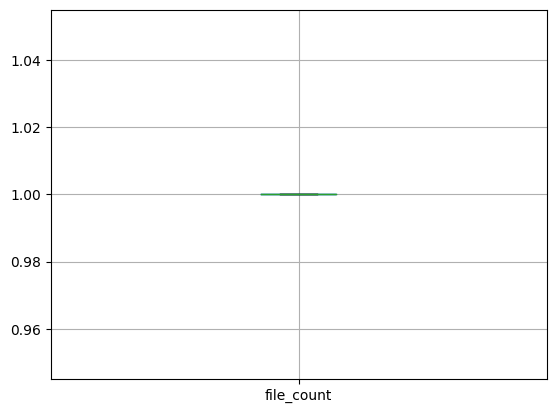

In [14]:
df_file_count = pd.DataFrame(data, columns=['merge_sha', 'file_count', 'chunks_count'])
print(df_file_count['file_count'].describe())
df_file_count.boxplot('file_count', showfliers=False)
plt.show()

In [15]:
df_file_count[df_file_count['file_count'] == 1]

,merge_sha,file_count,chunks_count
0,332b6ed4e324199565e235cd915368f9bc1b43d2,1,1
2,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,1,4
3,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,1,1
6,103e9fb9969fe35fba31d2430c8fc785a2f9808d,1,3
7,6b04b408d9c3bcaea5a7b21406e1f402c0a15330,1,1
...,...,...,...
5340,33b723991fd15f730ebe93d8d7e97a256586c99d,1,1
5341,3ac5abea92e6705ea94fdf1d6e0e9bb326ddd35e,1,1
5343,5835fb27160180763dd94f1bcc3f793a1e18c756,1,10
5344,fa4b36ef85026af9b66c3fbad66224e7b657e107,1,1


In [16]:
print(f"Number of merges with 1 file: {len(df_file_count[df_file_count['file_count'] == 1])}")
print(f"Number of merges with 1 chunk: {len(df_file_count[df_file_count['chunks_count'] == 1])}")
intersection = df_file_count[(df_file_count['file_count']==1) & (df_file_count['chunks_count']==1)]
print(f"Number of merges with 1 file and 1 chunk: {len(intersection)}")
print(f'Total number of merges: {len(df_file_count)}')


Number of merges with 1 file: 4051
Number of merges with 1 chunk: 2250
Number of merges with 1 file and 1 chunk: 2250
Total number of merges: 5346


In [17]:
df_file_count['chunks_count'].value_counts(normalize=True)

1      0.420875
2      0.212869
3      0.100262
4      0.072952
5      0.045455
         ...   
82     0.000187
86     0.000187
90     0.000187
98     0.000187
219    0.000187
Name: chunks_count, Length: 68, dtype: float64

## How big are the conflicts and the resolutions of failed merges?

### Number of chunks per failed merge

#### Considering merges that include at least one chunk resolved with combination

In [18]:
print(len(df['sha'].unique()))
merges_hybrid = all_chunks[all_chunks['sha'].isin(df['sha'].unique())]
# merges_hybrid

5346


In [19]:
merges_hybrid = merges_hybrid.groupby('sha')['developerdecision'].value_counts().unstack().reset_index()
merges_hybrid = merges_hybrid.fillna(0)
merges_hybrid['chunks'] = merges_hybrid['Combination'] + merges_hybrid['Concatenation'] + merges_hybrid['Manual'] + merges_hybrid['None'] + merges_hybrid['Version 1'] + merges_hybrid['Version 2']
merges_hybrid

developerdecision,sha,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
0,000bd2ff6db0144b479badddb92eb5c10a4a2111,1.0,0.0,3.0,0.0,0.0,1.0,5.0
1,00118d748e062fcc908d6b9e5cb8de08106220f9,4.0,0.0,0.0,0.0,9.0,1.0,14.0
2,002461f073aeb9170d6ae59fd80620d132999bf8,2.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0034d7ee70a180b8b8d1f80ec582f66c4d482181,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,004360fb8e5073a39c493f4e2119e4a623f46b94,2.0,2.0,2.0,0.0,0.0,3.0,9.0
...,...,...,...,...,...,...,...,...
5341,ffb66ec254d8266c03cf37b2937fe0570a3e8e24,3.0,0.0,0.0,0.0,0.0,0.0,3.0
5342,ffb8227c45c29acd4d3c5d4c7b45c4431dc586e8,2.0,2.0,0.0,0.0,1.0,0.0,5.0
5343,ffba1e9f8324e72e23a6a1156fd53c80e0ebce31,2.0,0.0,0.0,0.0,0.0,2.0,4.0
5344,ffc026d06b2cafcc77bb426a6a4e7d377afb97aa,3.0,0.0,3.0,0.0,0.0,1.0,7.0


In [20]:
merges_hybrid['chunks'] = merges_hybrid['chunks'].astype(int)
merges_hybrid.head()

developerdecision,sha,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
0,000bd2ff6db0144b479badddb92eb5c10a4a2111,1.0,0.0,3.0,0.0,0.0,1.0,5
1,00118d748e062fcc908d6b9e5cb8de08106220f9,4.0,0.0,0.0,0.0,9.0,1.0,14
2,002461f073aeb9170d6ae59fd80620d132999bf8,2.0,0.0,0.0,0.0,0.0,0.0,2
3,0034d7ee70a180b8b8d1f80ec582f66c4d482181,1.0,0.0,0.0,0.0,0.0,0.0,1
4,004360fb8e5073a39c493f4e2119e4a623f46b94,2.0,2.0,2.0,0.0,0.0,3.0,9


In [21]:
merges_hybrid['chunks'].sum()

52083

In [23]:
merges_hybrid['chunks'].describe()

count    5346.000000
mean        9.742424
std        36.114495
min         1.000000
25%         2.000000
50%         3.000000
75%         8.000000
max      1033.000000
Name: chunks, dtype: float64

In [24]:
merges_hybrid['chunks'].value_counts(normalize=True).head(20)

1     0.235877
2     0.170969
3     0.098391
4     0.082866
5     0.057239
6     0.054620
7     0.037411
8     0.032735
9     0.022634
10    0.020763
11    0.018331
12    0.016648
13    0.013281
14    0.010288
18    0.009166
16    0.008792
17    0.007669
15    0.007669
20    0.005425
28    0.005238
Name: chunks, dtype: float64

In [25]:
merges_hybrid[merges_hybrid['chunks']>= 18]

developerdecision,sha,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
18,011d4502794897a5da3e78b6b165884d79cd503b,7.0,0.0,17.0,1.0,6.0,3.0,34
23,01851eda60975dd18fba3ca9951b549dc3401157,2.0,2.0,15.0,0.0,2.0,9.0,30
66,038fa17ad33aeba276db84ab170504fce884c1e7,4.0,0.0,26.0,0.0,12.0,0.0,42
68,039457bd5371660963aa992763ebd38cce3b0b08,4.0,4.0,16.0,0.0,2.0,3.0,29
75,03f3cb083d708d4d3226b80ed42c9d2876a56edc,6.0,0.0,6.0,0.0,54.0,0.0,66
...,...,...,...,...,...,...,...,...
5269,fd34be9169490ef46e18e15ce77cfc18d472ec56,5.0,2.0,5.0,1.0,2.0,14.0,29
5272,fd3dab4ea8786c72c6b29cf1c94d4d25132f8146,6.0,0.0,0.0,0.0,16.0,9.0,31
5281,fd7447e9820da5e09c7cb90c4b57ef0e238cc9af,2.0,0.0,2.0,0.0,7.0,21.0,32
5314,feb7c8bbeea4d54ab66e42f2e363a9c11f5cddc4,2.0,0.0,11.0,0.0,22.0,3.0,38


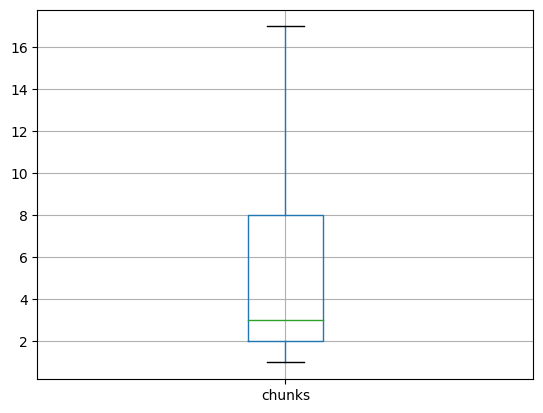

In [26]:
merges_hybrid.boxplot('chunks', showfliers=False)
plt.show()

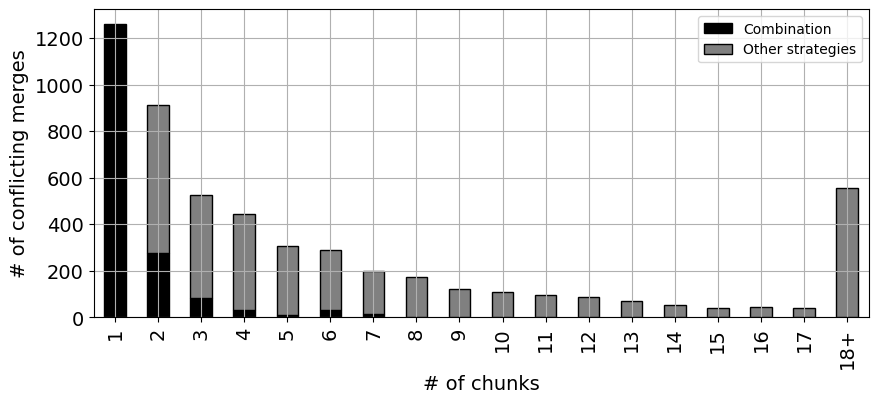

In [27]:
data = []
max_chunks = merges_hybrid['chunks'].max()
more_than_18 = 0
for chunks_amount in range(1, 18):
    merges_count = len(merges_hybrid[merges_hybrid['chunks'] == chunks_amount])
    merges_combination_count = len(merges_hybrid[(merges_hybrid['chunks'] == chunks_amount) & (merges_hybrid['Combination'] == merges_hybrid['chunks'])])
    merges_not_combination_count = merges_count - merges_combination_count
    if merges_count > 0:
        data.append([chunks_amount, merges_combination_count, merges_not_combination_count])

merges_count = len(merges_hybrid[merges_hybrid['chunks'] >= 18])
merges_combination_count = len(merges_hybrid[(merges_hybrid['chunks'] >= 18) & (merges_hybrid['Combination'] == merges_hybrid['chunks'])])
merges_not_combination_count = merges_count - merges_combination_count
data.append(['18+', merges_combination_count, merges_not_combination_count])

df_plot = pd.DataFrame(data, columns=['chunks', 'Combination', 'Other strategies'])
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df_plot.plot(kind='bar', x='chunks', stacked=True, ax=ax, legend=False, zorder=1, color=['black', 'gray'], edgecolor='black')
ax.set_xlabel("# of chunks", fontsize=14)
ax.set_ylabel("# of conflicting merges", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.legend(loc='upper right')
ax.grid(zorder=-1)
plt.show()
fig.savefig('figures/rq1_chunks_vs_merges.png', dpi=300, bbox_inches = "tight")

#### Considering merges that include only chunks resolved with combination

In [23]:
only_combination

developerdecision,sha,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
2,002461f073aeb9170d6ae59fd80620d132999bf8,2.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0034d7ee70a180b8b8d1f80ec582f66c4d482181,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0048da2114b54357e4901f40930afc7d503e0e24,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0089963825127738ac87895d80b7d84d6162bf2d,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,00a322674ca7ddd0931cdf8976353264a9e813ad,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
5336,ff8ce830e375033e045f6f36613a93a36462ff2b,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5337,ff940af8fe6d5affd3dc4ecc7d29bdb9ae9dc42e,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5338,ffa2c3ad3b4801b5f104c2f249ecfa15ccc99cc7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5339,ffabe6ddd6cbf694db7b86fb61bbf2f21c89c4d9,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
only_combination['chunks'].describe()

count    1726.000000
mean        1.575319
std         1.484941
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        18.000000
Name: chunks, dtype: float64

In [25]:
only_combination['chunks'].value_counts(normalize=True).head(20)

1.0     0.730591
2.0     0.161645
3.0     0.047509
4.0     0.019119
6.0     0.018540
7.0     0.009849
5.0     0.005214
12.0    0.002317
14.0    0.002317
9.0     0.001159
18.0    0.001159
8.0     0.000579
Name: chunks, dtype: float64

In [26]:
#only_combination[only_combination['chunks']>= 18]

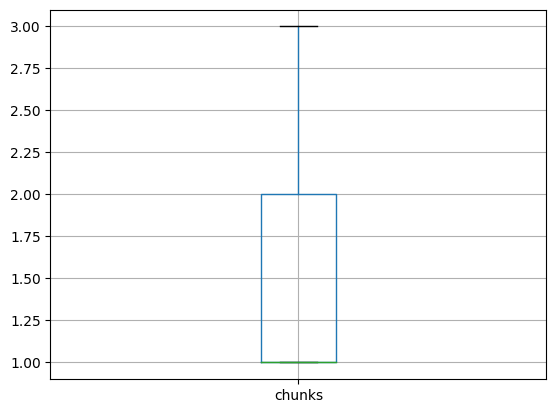

In [27]:
only_combination.boxplot('chunks', showfliers=False)
plt.show()

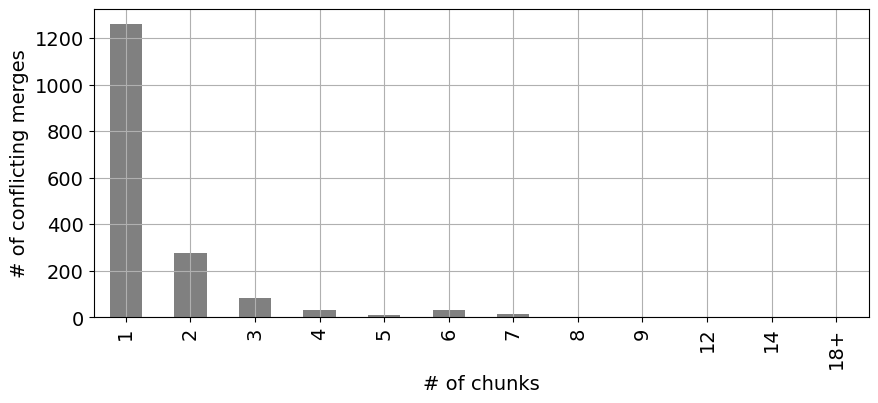

In [28]:
data = []
max_chunks = only_combination['chunks'].max()
more_than_18 = 0
for chunks_amount in range(1, 18):
    merges_count = len(only_combination[only_combination['chunks'] == chunks_amount])
    if merges_count > 0:
        data.append([chunks_amount, merges_count])

merges_count = len(only_combination[only_combination['chunks'] >= 18])
data.append(['18+', merges_count])

df_plot = pd.DataFrame(data, columns=['chunks', '# of merges'])
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df_plot.plot(kind='bar', x='chunks', stacked=True, ax=ax, legend=False, zorder=1, color='gray')
ax.set_xlabel("# of chunks", fontsize=14)
ax.set_ylabel("# of conflicting merges", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
# plt.legend(loc='upper right')
ax.grid(zorder=-1)
plt.show()
# fig.savefig('figures/rq1_chunks_vs_merges.png', dpi=300, bbox_inches = "tight")

### Chunks' size

In [29]:
df[['chunk_size', 'v1_size', 'v2_size']].describe()

,chunk_size,v1_size,v2_size
count,10177.000000,10177.00000,10177.000000
mean,13.760145,6.79493,6.965216
std,60.379367,30.51060,33.251309
min,2.000000,0.00000,0.000000
25%,4.000000,2.00000,2.000000
50%,6.000000,2.00000,3.000000
75%,11.000000,5.00000,5.000000
max,2545.000000,1352.00000,1402.000000


In [30]:
# remove outliers
from scipy import stats
df_analysis = df[['chunk_size', 'v1_size', 'v2_size']]
df_analysis = df_analysis[(np.abs(stats.zscore(df_analysis)) < 3).all(axis=1)]
df_analysis.describe()

,chunk_size,v1_size,v2_size
count,10098.000000,10098.000000,10098.000000
mean,10.098930,4.995346,5.103585
std,13.535336,8.059996,8.148442
min,2.000000,0.000000,0.000000
25%,4.000000,2.000000,2.000000
50%,6.000000,2.000000,3.000000
75%,11.000000,5.000000,5.000000
max,189.000000,96.000000,104.000000


In [31]:
df_analysis[df_analysis['chunk_size'] > 180]

,chunk_size,v1_size,v2_size
8403,189,96,93
8610,187,83,104


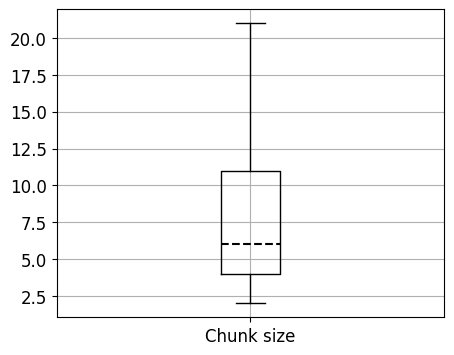

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
df.boxplot(['chunk_size'], showfliers=False, ax=ax, color='k', medianprops=dict(linestyle='--', linewidth=1.5, color='k'))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xticklabels(['Chunk size'])
plt.show()
fig.savefig('figures/chunk_size_distribution.png', dpi=300, bbox_inches = "tight")

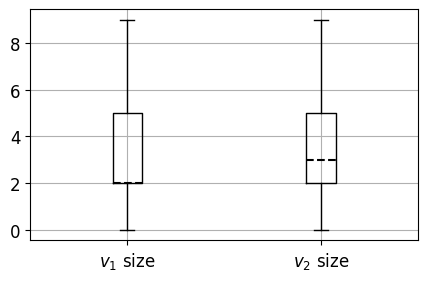

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
df.boxplot(['v1_size', 'v2_size'], showfliers=False, ax = ax, color = 'k', medianprops=dict(linestyle='--', linewidth=1.5, color='k'))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xticklabels(['$v_{1}$ size', '$v_{2}$ size'])
plt.show()
fig.savefig('figures/v1_v2_size.png', dpi=300, bbox_inches = "tight")

In [34]:
df['v1_size'].value_counts(normalize=True).head(50)

2     0.288887
1     0.142478
3     0.133536
0     0.076447
4     0.073401
5     0.050506
6     0.039599
7     0.028299
8     0.022600
9     0.017687
10    0.014641
11    0.011497
12    0.010416
13    0.008647
16    0.006878
15    0.006682
14    0.006583
18    0.004520
17    0.004422
19    0.003832
20    0.003439
22    0.002457
21    0.002457
25    0.001965
23    0.001965
24    0.001769
27    0.001769
26    0.001572
30    0.001376
29    0.001277
34    0.001277
28    0.001179
31    0.001081
37    0.001081
36    0.000983
33    0.000983
44    0.000884
32    0.000884
45    0.000786
35    0.000786
40    0.000688
39    0.000688
43    0.000688
41    0.000590
51    0.000491
38    0.000491
42    0.000491
63    0.000491
46    0.000393
64    0.000393
Name: v1_size, dtype: float64

In [35]:
df['v2_size'].value_counts(normalize=True).head(50)

2     0.293407
3     0.132554
1     0.125282
4     0.076643
0     0.073892
5     0.052766
6     0.038813
7     0.032033
8     0.024958
9     0.021716
10    0.014248
11    0.013167
12    0.011988
14    0.008156
13    0.007861
15    0.006977
16    0.005208
18    0.004815
17    0.004618
19    0.003930
20    0.003636
21    0.002653
27    0.002555
26    0.002162
22    0.002063
28    0.001670
23    0.001670
24    0.001670
25    0.001572
30    0.001376
29    0.000983
32    0.000983
34    0.000884
33    0.000884
35    0.000884
56    0.000884
40    0.000786
31    0.000786
37    0.000786
42    0.000786
43    0.000688
41    0.000590
39    0.000590
53    0.000590
62    0.000590
46    0.000491
38    0.000491
82    0.000491
93    0.000393
60    0.000393
Name: v2_size, dtype: float64

### Resolution size

In [36]:
df['resolution_size'].describe()

count    10177.000000
mean         8.516164
std         36.407157
min          1.000000
25%          2.000000
50%          3.000000
75%          7.000000
max       1557.000000
Name: resolution_size, dtype: float64

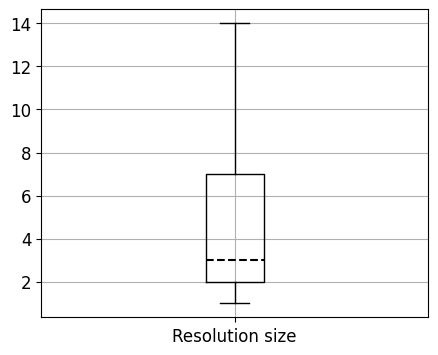

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
df.boxplot(['resolution_size'], showfliers=False, ax=ax, color = 'k', medianprops=dict(linestyle='--', linewidth=1.5, color='k'))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xticklabels(['Resolution size'])
plt.show()
# fig.savefig('figures/resolution_size.png', dpi=300, bbox_inches = "tight")

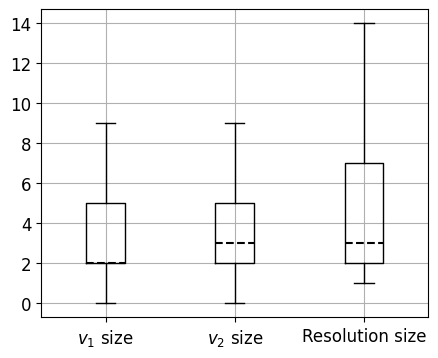

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
df.boxplot(['v1_size', 'v2_size', 'resolution_size'], showfliers=False, ax=ax, color = 'k', medianprops=dict(linestyle='--', linewidth=1.5, color='k'))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xticklabels(['$v_{1}$ size', '$v_{2}$ size','Resolution size'])
plt.show()
fig.savefig('figures/v1_v2_resolution_size.png', dpi=300, bbox_inches = "tight")

### Number of files per failed merge

### Considering all files with at least one chunk resolved with combination

In [39]:
hybrid_files['chunks'] = hybrid_files['chunks'].astype(int)
hybrid_files.head()

developerdecision,file_id,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
0,341965,1.0,0.0,0.0,0.0,0.0,0.0,1
1,342076,1.0,0.0,1.0,0.0,2.0,0.0,4
2,342083,1.0,0.0,0.0,0.0,0.0,0.0,1
3,342100,1.0,1.0,2.0,0.0,0.0,0.0,4
4,342118,1.0,0.0,0.0,0.0,0.0,0.0,1


In [40]:
hybrid_files['chunks'].sum()

20777

In [41]:
hybrid_files['chunks'].describe()

count    8347.000000
mean        2.489158
std         5.541251
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       258.000000
Name: chunks, dtype: float64

In [42]:
hybrid_files['chunks'].value_counts(normalize=True).head(20)

1     0.533126
2     0.220438
3     0.094405
4     0.050317
5     0.031029
6     0.017252
7     0.014376
8     0.006709
9     0.006230
10    0.004553
12    0.002755
13    0.002755
11    0.002755
15    0.001318
14    0.001318
16    0.000958
21    0.000958
18    0.000958
19    0.000839
22    0.000719
Name: chunks, dtype: float64

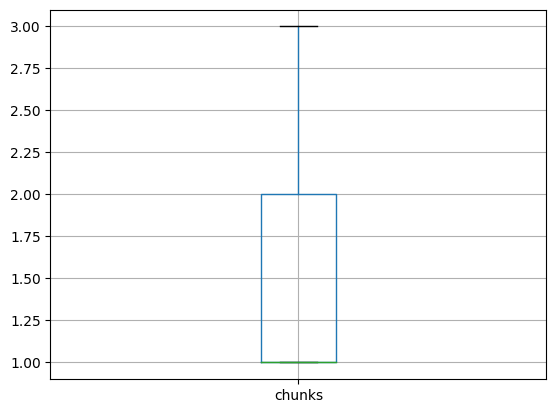

In [43]:
hybrid_files.boxplot('chunks', showfliers=False)
plt.show()

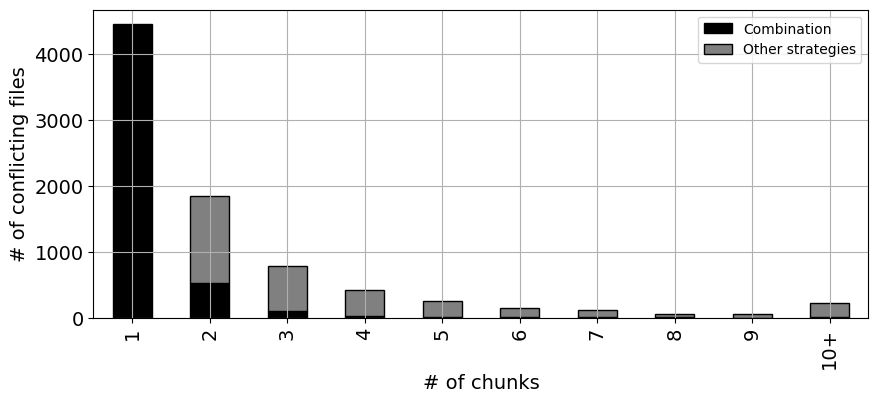

In [44]:
data = []
max_chunks = hybrid_files['chunks'].max()
more_than_18 = 0
for chunks_amount in range(1, 10):
    merges_count = len(hybrid_files[hybrid_files['chunks'] == chunks_amount])
    merges_combination_count = len(hybrid_files[(hybrid_files['chunks'] == chunks_amount) & (hybrid_files['Combination'] == hybrid_files['chunks'])])
    merges_not_combination_count = merges_count - merges_combination_count
    if merges_count > 0:
        data.append([chunks_amount, merges_combination_count, merges_not_combination_count])

merges_count = len(hybrid_files[hybrid_files['chunks'] >= 10])     
merges_combination_count = len(hybrid_files[(hybrid_files['chunks'] >= 10) & (hybrid_files['Combination'] == hybrid_files['chunks'])])
merges_not_combination_count = merges_count - merges_combination_count
data.append(['10+', merges_combination_count, merges_not_combination_count])

df_plot = pd.DataFrame(data, columns=['chunks','Combination', 'Other strategies'])
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df_plot.plot(kind='bar', x='chunks', stacked=True, ax=ax, legend=False, zorder=1, color=['black', 'gray'], edgecolor='black')
ax.set_xlabel("# of chunks", fontsize=14)
ax.set_ylabel("# of conflicting files", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.legend(loc='upper right')
ax.grid(zorder=-1)
plt.show()
fig.savefig('figures/chunks_per_file.png', dpi=300, bbox_inches = "tight")

### Considering only files where all chunks were resolved with combination

In [45]:
only_combination_files

developerdecision,file_id,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
0,341965,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,342083,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,342118,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,342153,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,342171,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
8339,752178,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8340,752179,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8343,752196,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8345,755614,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
only_combination_files['chunks'].sum()

6146.0

In [47]:
only_combination_files['chunks'].describe()

count    5124.000000
mean        1.199454
std         0.785899
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        19.000000
Name: chunks, dtype: float64

In [48]:
only_combination_files['chunks'].value_counts(normalize=True).head(20)

1.0     0.868462
2.0     0.102069
3.0     0.019126
4.0     0.003318
5.0     0.002342
6.0     0.001756
11.0    0.000976
19.0    0.000390
13.0    0.000390
8.0     0.000390
7.0     0.000390
15.0    0.000195
10.0    0.000195
Name: chunks, dtype: float64

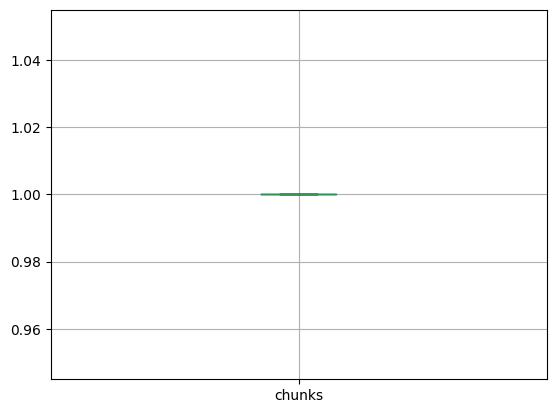

In [49]:
only_combination_files.boxplot('chunks', showfliers=False)
plt.show()

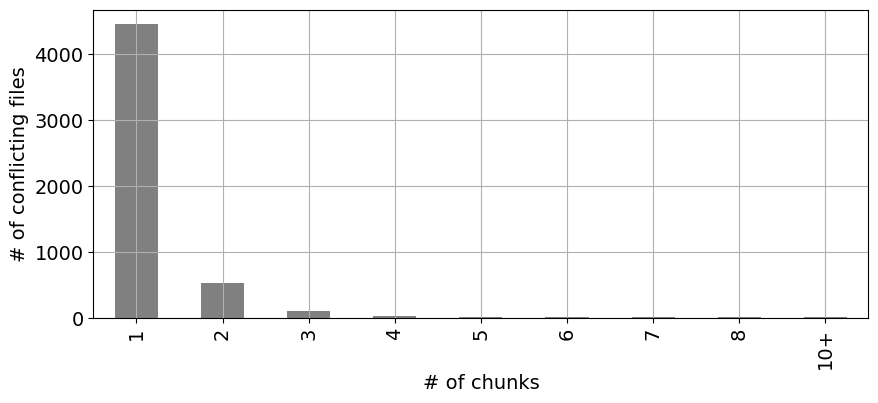

In [50]:
data = []
max_chunks = only_combination_files['chunks'].max()
more_than_18 = 0
for chunks_amount in range(1, 10):
    files_count = len(only_combination_files[only_combination_files['chunks'] == chunks_amount])
    if files_count > 0:
        data.append([chunks_amount, files_count])

files_count = len(only_combination_files[only_combination_files['chunks'] >= 10])     
data.append(['10+', files_count])

df_plot = pd.DataFrame(data, columns=['chunks','# of files'])
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df_plot.plot(kind='bar', x='chunks', stacked=True, ax=ax, legend=False, zorder=1, color = 'gray')
ax.set_xlabel("# of chunks", fontsize=14)
ax.set_ylabel("# of conflicting files", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
# plt.legend(loc='upper right')
ax.grid(zorder=-1)
plt.show()
# fig.savefig('figures/chunks_per_file.png', dpi=300, bbox_inches = "tight")

#### What is the average size of chunks for failed merges with varying number of chunks?

In [51]:
data = []
for chunks_number in range(1, 19):
    df_filter = only_combination[only_combination['chunks'] == chunks_number] # selects all merges that have 'chunks_number' chunks
    if len(df_filter) > 0:
        filtered = df[df['sha'].isin(list(df_filter['sha']))]
        median_size = statistics.median(filtered['chunk_size'])
        data.append([chunks_number, median_size])

df_plot = pd.DataFrame(data, columns=['chunks', 'median_size'])
df_plot.head()

,chunks,median_size
0,1,6.0
1,2,5.0
2,3,5.5
3,4,6.0
4,5,5.0


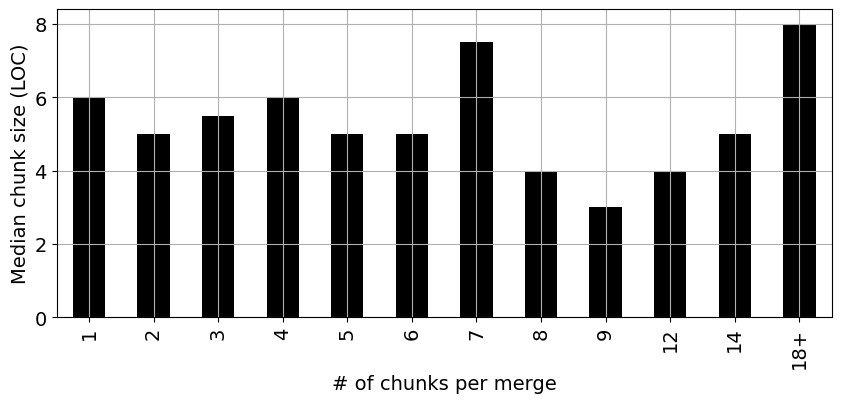

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df_plot.plot(kind='bar', x='chunks', y='median_size', ax=ax, legend=False, color = 'black')
ax.set_xlabel("# of chunks per merge", fontsize=14)
ax.set_ylabel("Median chunk size (LOC)", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.grid(zorder=-1)
labels = ax.get_xticklabels()
labels[-1] = '18+'
ax.set_xticklabels(labels)
plt.show()
fig.savefig('figures/median_size_per_chunks_per_merge.png', dpi=300, bbox_inches = "tight")